# Projet 1 Finance
## Première partie de nettoyage

### La demande du client:

L’objectif de ce projet est de créer un modèle d’apprentissage automatique permettant de prédire les personnes les plus susceptibles de faire défaut sur leurs prêts, en fonction de leurs comportements (historique) de remboursement des prêts et de leurs activités de commerce électronique.

### La problématique

**Identifier les personnes susceptibles de ne pas rembourser leur crédit**

### Traduction en ML

Modèle supervisé de classification

### Recherche sur la problématique métier
Xente Paylater est une application mobile qui permet les connections des acheteurs et des vendeurs les uns aux autres, puis ils permettent les connections à des institutions financières agréées pour les paiements, le crédit, l'épargne et l'assurance.

Les données qui seront utilisées pour ce projet ont été récupérées par cette plateforme.

Nous avons donc ici un dataset contenant l'historique de données bancaires de clients particuliers Ougandais. (voir CurrencyCode et CountryCode)

Nous avons à disposition 27 features caractérisants les données bancaires de clients. Une de ces features, est notre features Target, classant les clients comme étant un solvable pour un crédit où non.  
  
=> "IsDefaulted" classe les clients tel que: 1 = Defaut de remboursement, 0 = Respect du délais

In [1]:
# import des librairies
# Base
import csv
import pandas as pd
import numpy as np

# Dataviz
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import missingno as msno

# Seed
import random
random.seed(5)

In [2]:
def_var = pd.read_csv('./VariableDefinitions.csv')
def_var

,Variable,Definition
0,CustomerId,Unique number identifying the customer on plat...
1,TransactionStartTime,Transaction start time
2,Value,Value of transaction
3,Amount,Value of Transaction with charges
4,TransactionId,Unique transaction identifier on platform
5,BatchId,Identifier for bulk transactions being done on...
6,SubscriptionId,You can have one account with multiple subscri...
7,CurrencyCode,Country currency
8,CountryCode,Numerical geographical code of country
9,ProviderId,Source provider of Item bought


## Exploration des données
Importation des données et premières visualisations dans l'objectif de définir la stratégie d'approche pour le pre-processing et la modélisation.

Nous avons à disposition 2 jeux de données :
- Train : Le jeu d'entrainement
- Test : Le jeu de test

In [3]:
train = pd.read_csv('./train.csv')
train

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,3/30/2019 21:55,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_293,4/29/2019 14:35,1.0,InvestorId_1,4/29/2019 21:55,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,3/30/2019 23:54,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1040,4/29/2019 14:32,1.0,InvestorId_1,4/29/2019 23:53,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,3/31/2019 5:40,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1585,6/15/2019 6:20,1.0,InvestorId_1,4/30/2019 5:40,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,3/31/2019 9:37,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1314,4/23/2019 15:44,1.0,InvestorId_1,4/30/2019 9:37,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [4]:
test = pd.read_csv('./test.csv')
test

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_310,3/31/2019 13:33,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 13:33,LoanId_1027,InvestorId_1,LoanApplicationId_825,ThirdPartyId_1175
1,CustomerId_243,3/31/2019 15:04,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,3/31/2019 15:04,LoanId_768,InvestorId_1,LoanApplicationId_68,ThirdPartyId_604
2,CustomerId_142,3/31/2019 17:31,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 17:31,LoanId_1067,InvestorId_1,LoanApplicationId_1223,ThirdPartyId_1521
3,CustomerId_142,3/31/2019 17:32,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 17:32,LoanId_202,InvestorId_1,LoanApplicationId_633,ThirdPartyId_406
4,CustomerId_142,3/31/2019 17:34,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 17:34,LoanId_533,InvestorId_1,LoanApplicationId_309,ThirdPartyId_302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,CustomerId_412,7/16/2019 0:18,500.0,-500.0,TransactionId_680,BatchId_2079,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_1,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
901,CustomerId_326,7/16/2019 3:17,1000.0,-1000.0,TransactionId_2504,BatchId_1432,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
902,CustomerId_497,7/16/2019 15:06,1000.0,-1000.0,TransactionId_995,BatchId_1410,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
903,CustomerId_497,7/16/2019 15:09,800.0,-800.0,TransactionId_708,BatchId_1343,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN


In [5]:
# On note une différences du nombre de features entre nos 2 jeux

print('Train', train.shape)
print('Test', test.shape)

Train (2100, 27)
Test (905, 19)


In [6]:
# On identifie les colonnes absentes du jeu de test
# Comparer les noms de colonnes entre les 2 dataframes
list(set(train.columns) - set(test.columns))

['Currency',
 'AmountLoan',
 'IsFinalPayBack',
 'IsDefaulted',
 'DueDate',
 'PayBackId',
 'IsThirdPartyConfirmed',
 'PaidOnDate']

On note que nous avons n'avons pas le même nombre de features pour nos 2 datasets :
- Test : 27
- Train : 19
  
Sur les 8 features de différentes, on retrouve notre target "IsDefaulted".
Nous verrons comment nous choisirons d'utiliser les features de notre dataset de Test dans une autre partie.

Nous allons ici chercher à voir si nous avons des données null dans nos datasets.

In [7]:
# On cherche si il y a des données null
# On remarque des données nulls dans les features concernants les prêts
# Le nombre étant assez constants on va chercher un lien
train.isnull().sum()

CustomerId                 0
TransactionStartTime       0
Value                      0
Amount                     0
TransactionId              0
BatchId                    0
SubscriptionId             0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
TransactionStatus          0
IssuedDateLoan           612
AmountLoan               612
Currency                 612
LoanId                   612
PaidOnDate               612
IsFinalPayBack           612
InvestorId               612
DueDate                  614
LoanApplicationId        617
PayBackId                612
ThirdPartyId             614
IsThirdPartyConfirmed    612
IsDefaulted              612
dtype: int64

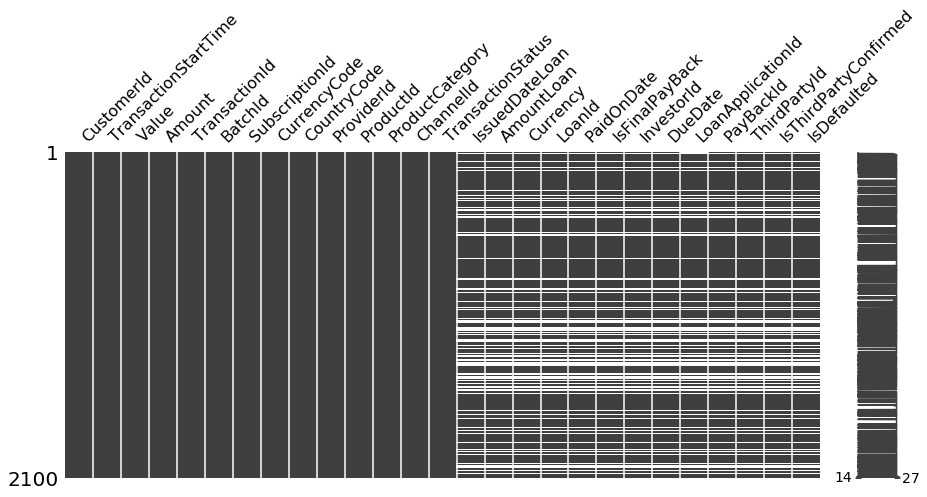

In [8]:
# Visualisation des données manquantes par un graphique
msno.matrix(train, figsize = (15, 6))

In [9]:
# On retrouve un nombre de prêts refusés équivalent au nombre de null repéré précedement
train.TransactionStatus.value_counts()

1    1488
0     612
Name: TransactionStatus, dtype: int64

In [10]:
# On opère avec la même stratégie pour les données test
# Comme pour le jeu de données Train, on observe un nombre de null constant
test.isnull().sum()

CustomerId                0
TransactionStartTime      0
Value                     0
Amount                    0
TransactionId             0
BatchId                   0
SubscriptionId            0
CurrencyCode              0
CountryCode               0
ProviderId                0
ProductId                 0
ProductCategory           0
ChannelId                 0
TransactionStatus         0
IssuedDateLoan          427
LoanId                  427
InvestorId              427
LoanApplicationId       427
ThirdPartyId            427
dtype: int64

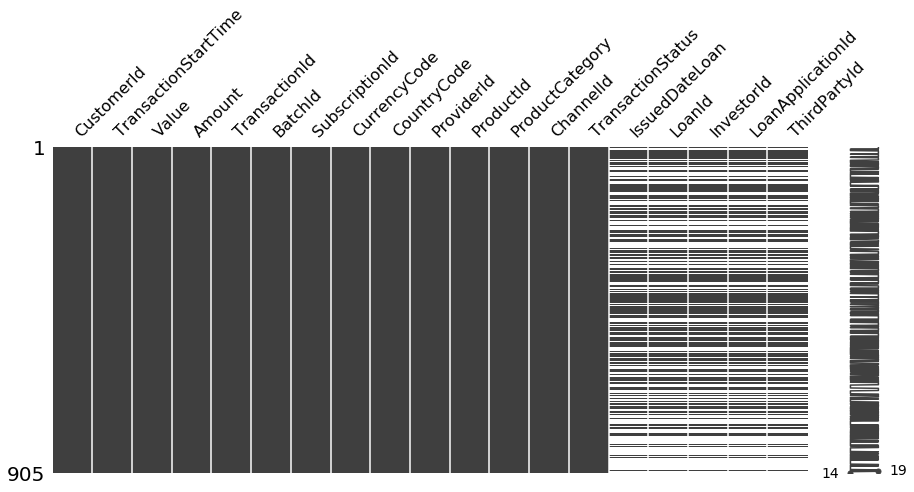

In [11]:
# Visualisation des données manquantes par un graphique
msno.matrix(test, figsize = (15, 6))

In [12]:
# Comme pour le jeu de Test, on retrouve une corrélation avec le nombre de prêt non accordé
test.TransactionStatus.value_counts()

1    478
0    427
Name: TransactionStatus, dtype: int64

### Conclusion de ces premières observations
On a identifier sur nos 2 datasets des données null, pouvant être expliqué par la non acceptation de prêt. Donc ces données peuvent être supprimées pour obtenir des datasets propres de données null.

Train : 612 null / 2100 Total = 1479 soit 75,60 %  
Test: 427 null / 905 Total = 478 soit 24,40 %

Si on décide de supprimer les valeurs null, alors nos proportions restent corrects.  
  
Donc on opte pour la stratégie de suppresion des données manquantes.

## Nettoyage des données 1
- Les valeurs null : suppresion dans les 2 datasets
- Les features aux valeurs uniques

In [13]:
# On drop les données null de Train
train_drop = train.copy()
train_drop.dropna(axis=0, how='any', inplace=True)

In [14]:
print(train_drop.shape)
train_drop.isnull().sum()

(1479, 27)


CustomerId               0
TransactionStartTime     0
Value                    0
Amount                   0
TransactionId            0
BatchId                  0
SubscriptionId           0
CurrencyCode             0
CountryCode              0
ProviderId               0
ProductId                0
ProductCategory          0
ChannelId                0
TransactionStatus        0
IssuedDateLoan           0
AmountLoan               0
Currency                 0
LoanId                   0
PaidOnDate               0
IsFinalPayBack           0
InvestorId               0
DueDate                  0
LoanApplicationId        0
PayBackId                0
ThirdPartyId             0
IsThirdPartyConfirmed    0
IsDefaulted              0
dtype: int64

In [15]:
# On drop les données null de Test
test_drop = test.copy()
test_drop.dropna(axis=0, how='any', inplace=True)

In [16]:
print(test_drop.shape)
test_drop.isnull().sum()

(478, 19)


CustomerId              0
TransactionStartTime    0
Value                   0
Amount                  0
TransactionId           0
BatchId                 0
SubscriptionId          0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
TransactionStatus       0
IssuedDateLoan          0
LoanId                  0
InvestorId              0
LoanApplicationId       0
ThirdPartyId            0
dtype: int64

## Nettoyage des données 2
On va se concentrer uniquement sur notre dataset Train:
- Les features aux valeurs uniques
- Les features ayant un intérêt limité pour nos visualisations et modèle (Id)
- Transformation de feature en catégorie (get_dummies)

On a repéré des features contenant des données uniques, qui ne présente donc aucune valeurs pour notre modèle. On décide de les supprimer.

In [17]:
c= train_drop.columns
c[0]
z= range(0,len(c)+1)

for x,z in zip(c,z):
    print(c[z],len(train[x].unique()))

CustomerId 421
TransactionStartTime 1606
Value 98
Amount 77
TransactionId 1758
BatchId 1713
SubscriptionId 6
CurrencyCode 1
CountryCode 1
ProviderId 1
ProductId 16
ProductCategory 7
ChannelId 1
TransactionStatus 2
IssuedDateLoan 1102
AmountLoan 648
Currency 2
LoanId 1160
PaidOnDate 1428
IsFinalPayBack 3
InvestorId 4
DueDate 1102
LoanApplicationId 1157
PayBackId 1486
ThirdPartyId 1482
IsThirdPartyConfirmed 3
IsDefaulted 3


In [18]:
train_drop[['CurrencyCode', 'CountryCode', 'ProviderId', 'ChannelId']].head()

,CurrencyCode,CountryCode,ProviderId,ChannelId
15,UGX,256,ProviderId_1,ChannelId_1
17,UGX,256,ProviderId_1,ChannelId_1
18,UGX,256,ProviderId_1,ChannelId_1
19,UGX,256,ProviderId_1,ChannelId_1
20,UGX,256,ProviderId_1,ChannelId_1


In [19]:
# Drop des colonnes avec des valeurs uniques
train_drop.drop(['CurrencyCode', 'CountryCode', 'ProviderId', 'ChannelId'], axis=1, inplace=True)

In [20]:
train_drop_clean = train_drop
train_drop_clean.columns

Index(['CustomerId', 'TransactionStartTime', 'Value', 'Amount',
       'TransactionId', 'BatchId', 'SubscriptionId', 'ProductId',
       'ProductCategory', 'TransactionStatus', 'IssuedDateLoan', 'AmountLoan',
       'Currency', 'LoanId', 'PaidOnDate', 'IsFinalPayBack', 'InvestorId',
       'DueDate', 'LoanApplicationId', 'PayBackId', 'ThirdPartyId',
       'IsThirdPartyConfirmed', 'IsDefaulted'],
      dtype='object')

In [21]:
train_drop_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 15 to 2099
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             1479 non-null   object 
 1   TransactionStartTime   1479 non-null   object 
 2   Value                  1479 non-null   float64
 3   Amount                 1479 non-null   float64
 4   TransactionId          1479 non-null   object 
 5   BatchId                1479 non-null   object 
 6   SubscriptionId         1479 non-null   object 
 7   ProductId              1479 non-null   object 
 8   ProductCategory        1479 non-null   object 
 9   TransactionStatus      1479 non-null   int64  
 10  IssuedDateLoan         1479 non-null   object 
 11  AmountLoan             1479 non-null   float64
 12  Currency               1479 non-null   object 
 13  LoanId                 1479 non-null   object 
 14  PaidOnDate             1479 non-null   object 
 15  IsF

On se rend compte que nous n'avons pas d'ID unique. Chacun de client pouvant contracter plusieurs crédit, il nous faut plutot travailler avec l'ID de remboursement ('PaybackID') qui lui est unique.
  
  
  
Nous avons 1479 ligne et PaybackID a 1476 valeurs unique. Nous avons donc des doublons qu'il va nous falloir analyser et nettoyer.


In [22]:
c= train_drop_clean.columns
c[0]
z= range(0,len(c)+1)

for x,z in zip(c,z):
    print(c[z],len(train_drop_clean[x].unique()))

CustomerId 238
TransactionStartTime 1095
Value 85
Amount 69
TransactionId 1149
BatchId 1122
SubscriptionId 5
ProductId 15
ProductCategory 7
TransactionStatus 1
IssuedDateLoan 1098
AmountLoan 641
Currency 1
LoanId 1153
PaidOnDate 1418
IsFinalPayBack 2
InvestorId 3
DueDate 1098
LoanApplicationId 1153
PayBackId 1476
ThirdPartyId 1474
IsThirdPartyConfirmed 2
IsDefaulted 2


In [23]:
# On repère quels sont les ID qui se répètent
train_drop_clean.PayBackId.value_counts()

PayBackId_1625    2
PayBackId_1595    2
PayBackId_1889    2
PayBackId_1983    1
PayBackId_1289    1
                 ..
PayBackId_791     1
PayBackId_1948    1
PayBackId_1908    1
PayBackId_1904    1
PayBackId_1097    1
Name: PayBackId, Length: 1476, dtype: int64

In [24]:
# On affiche les lignes concerné par ces répétitions
# On observe que les doublons concerne le même client, et que les infos sont sensiblement les mêmes
# On décide de supprimer une ligne sur deux dans l'optique de conserver un max d'informations
train_drop_clean[(train_drop_clean["PayBackId"] == "PayBackId_1889") |
(train_drop_clean["PayBackId"] == "PayBackId_1625") | (train_drop_clean["PayBackId"] == "PayBackId_1595")]

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,ProductId,ProductCategory,TransactionStatus,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
1660,CustomerId_86,2/28/2019 16:42,1000.0,-1000.0,TransactionId_2660,BatchId_858,SubscriptionId_7,ProductId_1,airtime,1,...,LoanId_448,4/8/2019 12:35,1.0,InvestorId_1,3/30/2019 16:42,LoanApplicationId_585,PayBackId_1889,ThirdPartyId_1090,1.0,0.0
1661,CustomerId_86,2/28/2019 16:42,1000.0,-1000.0,TransactionId_2660,BatchId_858,SubscriptionId_7,ProductId_1,airtime,1,...,LoanId_908,5/31/2019 13:28,1.0,InvestorId_1,3/30/2019 16:42,LoanApplicationId_1312,PayBackId_1625,ThirdPartyId_165,1.0,0.0
1662,CustomerId_86,2/28/2019 16:42,1000.0,-1000.0,TransactionId_1036,BatchId_858,SubscriptionId_7,ProductId_1,airtime,1,...,LoanId_448,4/8/2019 12:35,1.0,InvestorId_1,3/30/2019 16:42,LoanApplicationId_585,PayBackId_1889,ThirdPartyId_1090,1.0,0.0
1663,CustomerId_86,2/28/2019 16:42,1000.0,-1000.0,TransactionId_1036,BatchId_858,SubscriptionId_7,ProductId_1,airtime,1,...,LoanId_908,5/31/2019 13:28,1.0,InvestorId_1,3/30/2019 16:42,LoanApplicationId_1312,PayBackId_1625,ThirdPartyId_165,1.0,0.0
2017,CustomerId_86,3/21/2019 18:00,2000.0,-2000.0,TransactionId_1935,BatchId_2505,SubscriptionId_7,ProductId_1,airtime,1,...,LoanId_667,6/7/2019 6:20,1.0,InvestorId_1,4/20/2019 18:00,LoanApplicationId_267,PayBackId_1595,ThirdPartyId_1149,1.0,0.0
2018,CustomerId_86,3/21/2019 18:00,2000.0,-2000.0,TransactionId_2256,BatchId_2505,SubscriptionId_7,ProductId_1,airtime,1,...,LoanId_667,6/7/2019 6:20,1.0,InvestorId_1,4/20/2019 18:00,LoanApplicationId_267,PayBackId_1595,ThirdPartyId_1149,1.0,0.0


In [25]:
train_drop_clean.drop_duplicates(subset=['PayBackId'], inplace = True)

In [26]:
# On continue le nettoyage des features.
# Repérer celles avec des valeurs uniques et celles qui sont d'un intérêt limités pour le modèle.

c= train_drop_clean.columns
c[0]
z= range(0,len(c)+1)

for x,z in zip(c,z):
    print(c[z],len(train_drop_clean[x].unique()))

CustomerId 238
TransactionStartTime 1095
Value 85
Amount 69
TransactionId 1147
BatchId 1122
SubscriptionId 5
ProductId 15
ProductCategory 7
TransactionStatus 1
IssuedDateLoan 1098
AmountLoan 641
Currency 1
LoanId 1153
PaidOnDate 1418
IsFinalPayBack 2
InvestorId 3
DueDate 1098
LoanApplicationId 1153
PayBackId 1476
ThirdPartyId 1474
IsThirdPartyConfirmed 2
IsDefaulted 2


In [27]:
train_drop_clean.shape

(1476, 23)

On choisit de supprimer les features suivantes, présentant:
   - Des valeurs uniques: 'TransactionStatus', 'Currency'
   - Un intérêt limité (id): 'TransactionId', 'BatchId', 'SubscriptionId','LoanId', 'InvestorId', 'LoanApplicationId', 'ThirdPartyId'

In [28]:
# Suppression des colonnes
train_drop_clean.drop(['TransactionStatus', 'Currency', 'TransactionId', 'BatchId', 'SubscriptionId',
                      'LoanId', 'InvestorId', 'LoanApplicationId', 'ThirdPartyId'], axis=1, inplace=True)

In [29]:
train_drop_final = train_drop_clean

In [30]:
train_final_idclean = train_drop_final

In [31]:
# On transforme une la colonne productId en catégorie
train_final_idclean["ProductId"] = train_final_idclean["ProductId"].str.extract('(\d+)', expand = False).astype(int)

In [32]:
train_final_idclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476 entries, 15 to 2099
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             1476 non-null   object 
 1   TransactionStartTime   1476 non-null   object 
 2   Value                  1476 non-null   float64
 3   Amount                 1476 non-null   float64
 4   ProductId              1476 non-null   int32  
 5   ProductCategory        1476 non-null   object 
 6   IssuedDateLoan         1476 non-null   object 
 7   AmountLoan             1476 non-null   float64
 8   PaidOnDate             1476 non-null   object 
 9   IsFinalPayBack         1476 non-null   float64
 10  DueDate                1476 non-null   object 
 11  PayBackId              1476 non-null   object 
 12  IsThirdPartyConfirmed  1476 non-null   float64
 13  IsDefaulted            1476 non-null   float64
dtypes: float64(6), int32(1), object(7)
memory usage: 167.2+

In [33]:
# On observe qu'il y a plus de ProductId que de ProductCategory

print(train_drop_final.ProductCategory.value_counts())
print(train_drop_final.ProductId.value_counts())

airtime               917
retail                235
data_bundles          177
utility_bill           86
tv                     53
movies                  5
financial_services      3
Name: ProductCategory, dtype: int64
3     447
7     386
18    235
4     100
1      84
15     74
8      66
13     36
6      12
9      11
2      11
17      5
5       5
10      3
16      1
Name: ProductId, dtype: int64


In [34]:
# On identifie que ProductCategory peuvent contenir plusieurs ProductId différents
# On décide de ne conserver que la colonne ProductCategory qui nous donne l'info principale

var = ('airtime','retail', 'data_bundles', 'utility_bill', 'tv', 'movies', 'financial_services')

for i in var:
    print(i)
    print(train_drop_final['ProductId'][train_drop_final['ProductCategory'] == i].value_counts())

'''
AUTRE FACON DE CONSTRUIRE LA BOUCLE
var = df_train["ProductCategory"].unique() => je rappel les noms via la liste du .unique()

for i in var:
    print(i,"\n", df_train['ProductId'][df_train['ProductCategory'] == i].value_counts(), "\n")
    => Tout peut être mis dans le meme print
    '''

airtime
3    447
7    386
1     84
Name: ProductId, dtype: int64
retail
18    235
Name: ProductId, dtype: int64
data_bundles
4    100
8     66
2     11
Name: ProductId, dtype: int64
utility_bill
15    74
9     11
16     1
Name: ProductId, dtype: int64
tv
13    36
6     12
5      5
Name: ProductId, dtype: int64
movies
17    5
Name: ProductId, dtype: int64
financial_services
10    3
Name: ProductId, dtype: int64


'\nAUTRE FACON DE CONSTRUIRE LA BOUCLE\nvar = df_train["ProductCategory"].unique() => je rappel les noms via la liste du .unique()\n\nfor i in var:\n    print(i,"\n", df_train[\'ProductId\'][df_train[\'ProductCategory\'] == i].value_counts(), "\n")\n    => Tout peut être mis dans le meme print\n    '

In [35]:
# On supprime la colonne ProductId
train_drop_final.drop(['ProductId'], axis=1, inplace=True)

In [36]:
train_drop_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476 entries, 15 to 2099
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             1476 non-null   object 
 1   TransactionStartTime   1476 non-null   object 
 2   Value                  1476 non-null   float64
 3   Amount                 1476 non-null   float64
 4   ProductCategory        1476 non-null   object 
 5   IssuedDateLoan         1476 non-null   object 
 6   AmountLoan             1476 non-null   float64
 7   PaidOnDate             1476 non-null   object 
 8   IsFinalPayBack         1476 non-null   float64
 9   DueDate                1476 non-null   object 
 10  PayBackId              1476 non-null   object 
 11  IsThirdPartyConfirmed  1476 non-null   float64
 12  IsDefaulted            1476 non-null   float64
dtypes: float64(6), object(7)
memory usage: 161.4+ KB


In [37]:
# On transforme la colonne ProductCategory avec get_dummies
# Cela nous permet d'obtenir une colonne / catégorie produits, en numérique

train_drop_dummies = pd.get_dummies(train_drop_final, columns = ['ProductCategory'])
train_drop_dummies

,CustomerId,TransactionStartTime,Value,Amount,IssuedDateLoan,AmountLoan,PaidOnDate,IsFinalPayBack,DueDate,PayBackId,IsThirdPartyConfirmed,IsDefaulted,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill
15,CustomerId_233,10/22/2018 16:04,5000.0,-5000.0,10/22/2018 16:04,5375.0,10/30/2018 6:49,1.0,11/21/2018 16:03,PayBackId_1719,0.0,0.0,1,0,0,0,0,0,0
17,CustomerId_305,10/23/2018 13:12,500.0,-500.0,10/23/2018 13:12,543.0,10/23/2018 13:18,1.0,11/22/2018 13:12,PayBackId_725,0.0,0.0,1,0,0,0,0,0,0
18,CustomerId_27,10/23/2018 15:20,1000.0,-1000.0,10/23/2018 15:20,1085.0,10/23/2018 15:26,1.0,11/22/2018 15:20,PayBackId_1085,0.0,0.0,1,0,0,0,0,0,0
19,CustomerId_27,10/23/2018 15:31,500.0,-500.0,10/24/2018 6:34,543.0,10/24/2018 6:38,1.0,11/23/2018 6:33,PayBackId_763,0.0,0.0,1,0,0,0,0,0,0
20,CustomerId_27,10/24/2018 6:56,500.0,-500.0,10/24/2018 6:56,543.0,10/24/2018 7:01,1.0,11/23/2018 6:55,PayBackId_1228,0.0,0.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,3/30/2019 21:55,2000.0,-2000.0,3/30/2019 21:55,2370.0,4/29/2019 14:35,1.0,4/29/2019 21:55,PayBackId_1106,1.0,0.0,0,1,0,0,0,0,0
2096,CustomerId_28,3/30/2019 23:54,5000.0,-5000.0,3/30/2019 23:54,5925.0,4/29/2019 14:32,1.0,4/29/2019 23:53,PayBackId_966,1.0,0.0,1,0,0,0,0,0,0
2097,CustomerId_34,3/31/2019 5:40,5000.0,-5000.0,3/31/2019 5:40,7100.0,6/15/2019 6:20,1.0,4/30/2019 5:40,PayBackId_1271,1.0,0.0,1,0,0,0,0,0,0
2098,CustomerId_346,3/31/2019 9:37,1500.0,-1500.0,3/31/2019 9:37,1733.0,4/23/2019 15:44,1.0,4/30/2019 9:37,PayBackId_945,1.0,0.0,0,1,0,0,0,0,0


In [38]:
train_drop_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476 entries, 15 to 2099
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CustomerId                          1476 non-null   object 
 1   TransactionStartTime                1476 non-null   object 
 2   Value                               1476 non-null   float64
 3   Amount                              1476 non-null   float64
 4   IssuedDateLoan                      1476 non-null   object 
 5   AmountLoan                          1476 non-null   float64
 6   PaidOnDate                          1476 non-null   object 
 7   IsFinalPayBack                      1476 non-null   float64
 8   DueDate                             1476 non-null   object 
 9   PayBackId                           1476 non-null   object 
 10  IsThirdPartyConfirmed               1476 non-null   float64
 11  IsDefaulted                         1476 n

## Conclusion du nettoyage de données
Cette partie de nettoyage est terminée. Pour récapituler les actions effectuées:
- Suppresion des valeurs Null sur les datasets Train et Test  
  
  Pour le dataset Train:
- Suppressions de doublons
- Suppresions des features à valeur unique ont été supprimée
- Suppresions des features ayant un intérêt limité dans notre projet (id)
- Transformation de la colonne ProductCategory avec Get_dummies

Nous avons choisit de conserver en l'état certaines features d'id et de dates qui pourrait nous servir dans certaines visualisations et pour faire des tests avec les modèles.


In [39]:
# export de nos datasets train et test
train_drop_dummies.to_csv('./train_clean.csv', index=True)
test_drop.to_csv('./test_drop.csv', index=True)